In [1]:
import cv2
import numpy as np
import os
import random
import json
import matplotlib.pyplot as plt

In [17]:
'''
warp thermal images for training set
'''
thermal_train = './homography/homography_thr_train'
rgb_train = './homography/homography_rgb_train'

if not (os.path.exists('./train_thr_template')):
    os.mkdir('./train_thr_template')
if not (os.path.exists('./train_labels')):
    os.mkdir('./train_labels')
if not (os.path.exists('./train_rgb_input')):
    os.mkdir('./train_rgb_input')

for img_file in os.listdir(thermal_train):
    thr_img = cv2.imread(os.path.join(thermal_train, img_file))
    rgb_img = cv2.imread(os.path.join(rgb_train, img_file))
    # crop the width such that it becomes a square
    height, width, channels = rgb_img.shape

    width_to_crop_per_side = (width - height) // 2
    rgb_img_sqr = rgb_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    thr_img_sqr = thr_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    # follow resizing of research paper
    rgb_img_resized = cv2.resize(rgb_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    thr_img_resized = cv2.resize(thr_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    # save new RGB image to input/
    cv2.imwrite(os.path.join('./train_rgb_input', img_file), rgb_img_resized)
    
    # get random points from corner boxes
    top_left_box_u=random.randint(0,63)
    top_left_box_v=random.randint(0,63)

    top_right_box_u=random.randint(128,191)
    top_right_box_v=random.randint(0,63)

    bottom_left_box_u=random.randint(0,63)
    bottom_left_box_v=random.randint(128,191)

    bottom_right_box_u=random.randint(128,191)
    bottom_right_box_v=random.randint(128,191)

    src_points = [[top_left_box_u,top_left_box_v],[top_right_box_u,top_right_box_v],[bottom_left_box_u,bottom_left_box_v],[bottom_right_box_u,bottom_right_box_v]]
    tgt_points = [[32,32],[159,32],[32,159],[159,159]] # hard coded
    
    src_points = np.reshape(src_points,[4,1,2])
    tgt_points = np.reshape(tgt_points,[4,1,2])
    
    # calculate homography
    h, status = cv2.findHomography(src_points, tgt_points, 0)
    warped_img = cv2.warpPerspective(thr_img_resized, h, (192, 192))
    # convert to grayscale because dataset thermal images are coloured
    warped_img = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(os.path.join('./train_thr_template', img_file), warped_img[32:160,32:160])
    
    label = {}
    label['location'] = []

    label['location'].append({
          'top_left_u':top_left_box_u,
          'top_left_v': top_left_box_v
      })
    label['location'].append({
          'top_right_u':top_right_box_u,
          'top_right_v':top_right_box_v
      })
    label['location'].append({
          'bottom_left_u':bottom_left_box_u,
          'bottom_left_v':bottom_left_box_v
      })
    label['location'].append({
          'bottom_right_u':bottom_right_box_u,
          'bottom_right_v':bottom_right_box_v
      })
    
    with open('./train_labels/' + os.path.splitext(img_file)[0] + '_label.txt', 'w') as outfile:
        json.dump(label, outfile)



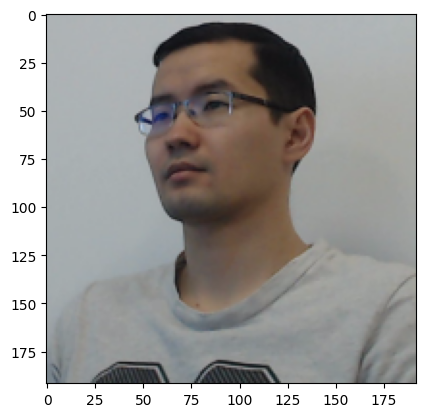

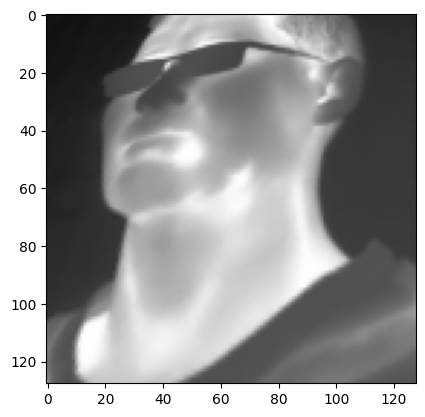

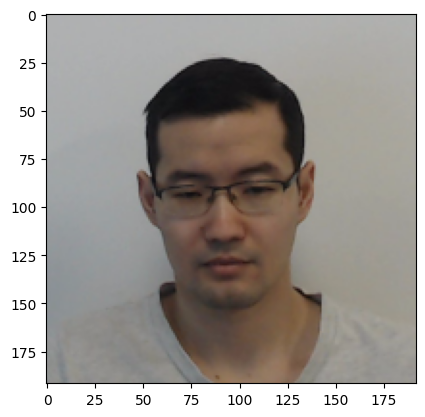

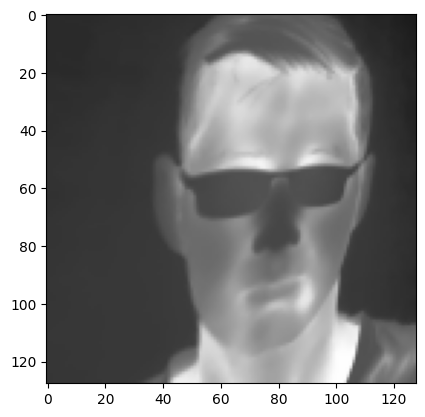

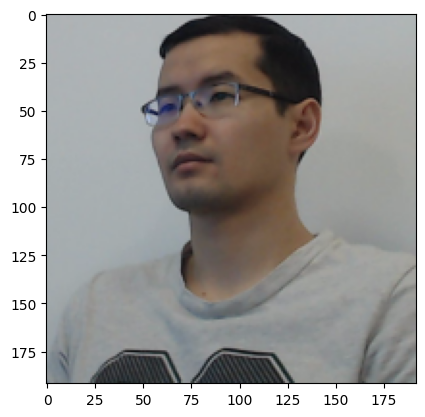

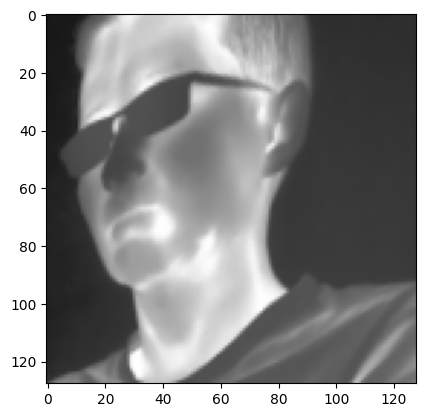

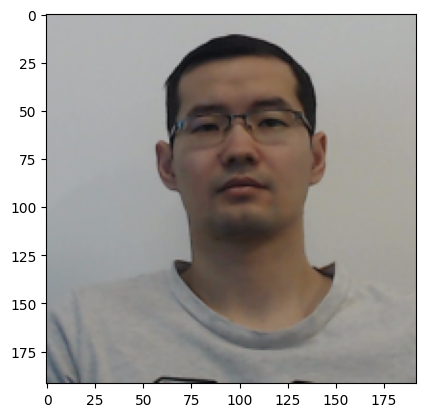

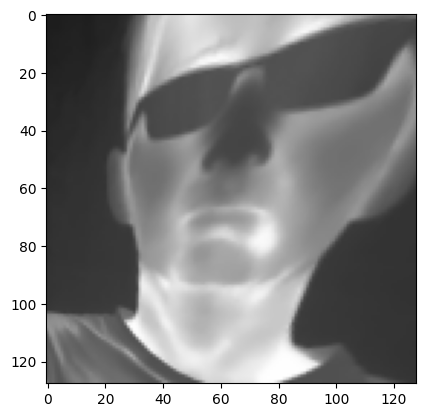

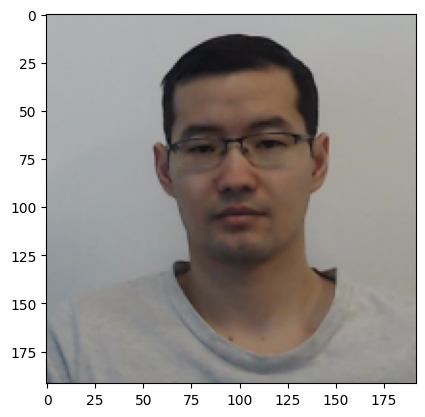

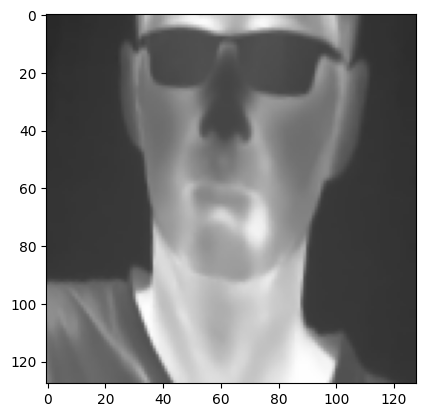

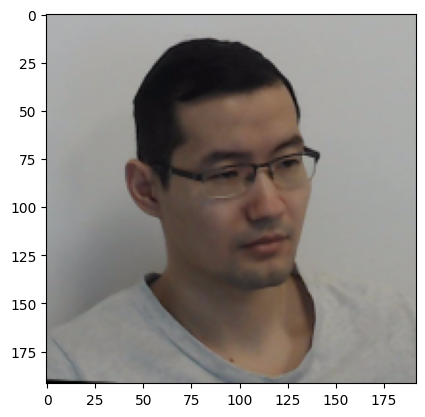

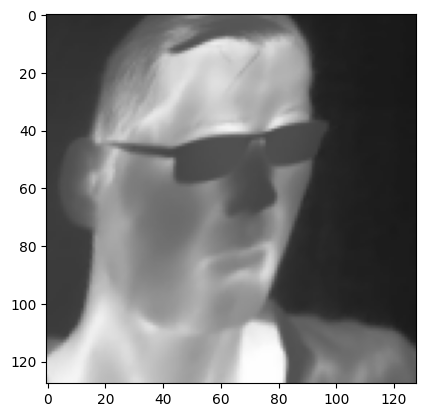

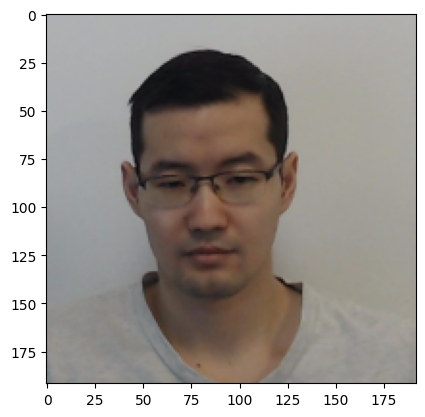

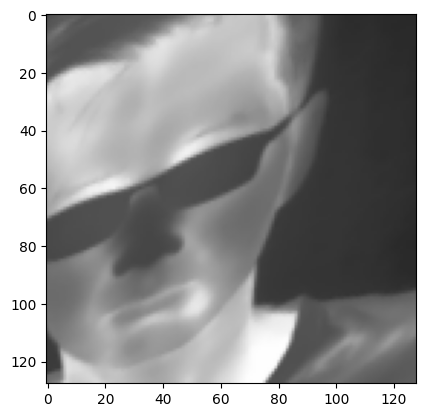

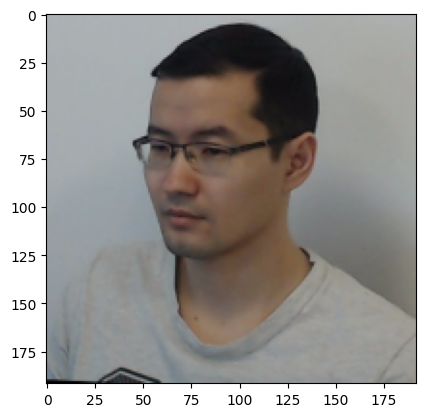

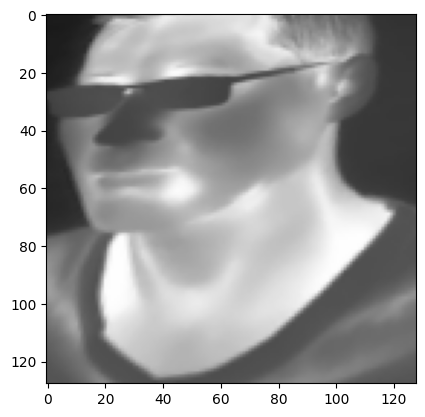

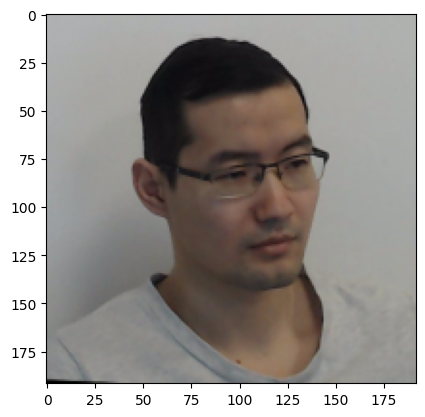

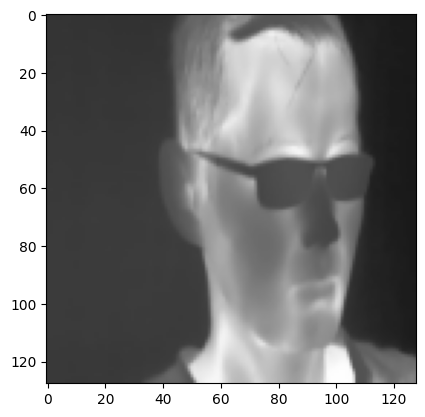

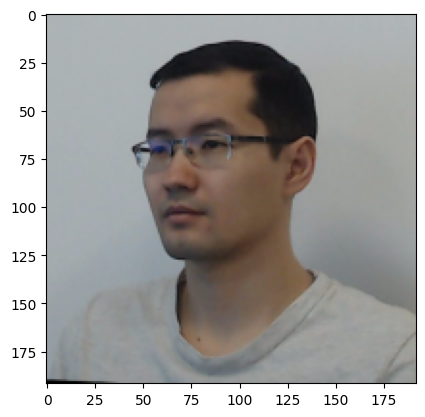

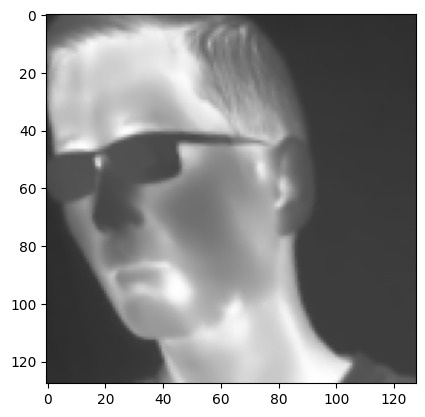

In [20]:
import random
# Review some images
no_imgs = len(os.listdir('./train_rgb_input'))
train_rgb_dir = './train_rgb_input'
train_thr_dir = './train_thr_template'

for _ in range(10):
    rand_idx = random.randint(0, no_imgs)
    rgb = cv2.cvtColor(cv2.imread(os.path.join(train_rgb_dir, os.listdir(train_rgb_dir)[rand_idx])), cv2.COLOR_RGB2BGR)
    plt.imshow(rgb)
    plt.show()
    
    thr = cv2.imread(os.path.join(train_thr_dir, os.listdir(train_thr_dir)[rand_idx]))
    plt.imshow(thr)
    plt.show()

In [21]:
'''
warp thermal images for validation set
'''
thermal_val = './homography/homography_thr_val'
rgb_val = './homography/homography_rgb_val'

if not (os.path.exists('./val_thr_template')):
    os.mkdir('./val_thr_template')
if not (os.path.exists('./val_labels')):
    os.mkdir('./val_labels')
if not (os.path.exists('./val_rgb_input')):
    os.mkdir('./val_rgb_input')

for img_file in os.listdir(thermal_val):
    thr_img = cv2.imread(os.path.join(thermal_val, img_file))
    rgb_img = cv2.imread(os.path.join(rgb_val, img_file))
    # crop the width such that it becomes a square
    height, width, channels = rgb_img.shape

    width_to_crop_per_side = (width - height) // 2
    rgb_img_sqr = rgb_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    thr_img_sqr = thr_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    # follow resizing of research paper
    rgb_img_resized = cv2.resize(rgb_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    thr_img_resized = cv2.resize(thr_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    # save new RGB image to input/
    cv2.imwrite(os.path.join('./val_rgb_input', img_file), rgb_img_resized)
    
    # get random points from corner boxes
    top_left_box_u=random.randint(0,63)
    top_left_box_v=random.randint(0,63)

    top_right_box_u=random.randint(128,191)
    top_right_box_v=random.randint(0,63)

    bottom_left_box_u=random.randint(0,63)
    bottom_left_box_v=random.randint(128,191)

    bottom_right_box_u=random.randint(128,191)
    bottom_right_box_v=random.randint(128,191)

    src_points = [[top_left_box_u,top_left_box_v],[top_right_box_u,top_right_box_v],[bottom_left_box_u,bottom_left_box_v],[bottom_right_box_u,bottom_right_box_v]]
    tgt_points = [[32,32],[159,32],[32,159],[159,159]] # hard coded
    
    src_points = np.reshape(src_points,[4,1,2])
    tgt_points = np.reshape(tgt_points,[4,1,2])
    
    # calculate homography
    h, status = cv2.findHomography(src_points, tgt_points, 0)
    warped_img = cv2.warpPerspective(thr_img_resized, h, (192, 192))
    # convert to grayscale because dataset thermal images are coloured
    warped_img = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(os.path.join('./val_thr_template', img_file), warped_img[32:160,32:160])
    
    label = {}
    label['location'] = []

    label['location'].append({
          'top_left_u':top_left_box_u,
          'top_left_v': top_left_box_v
      })
    label['location'].append({
          'top_right_u':top_right_box_u,
          'top_right_v':top_right_box_v
      })
    label['location'].append({
          'bottom_left_u':bottom_left_box_u,
          'bottom_left_v':bottom_left_box_v
      })
    label['location'].append({
          'bottom_right_u':bottom_right_box_u,
          'bottom_right_v':bottom_right_box_v
      })
    
    with open('./val_labels/' + os.path.splitext(img_file)[0] + '_label.txt', 'w') as outfile:
        json.dump(label, outfile)

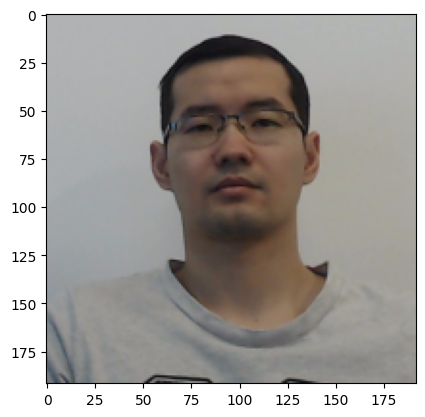

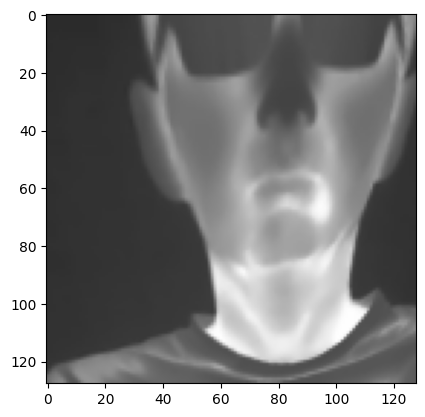

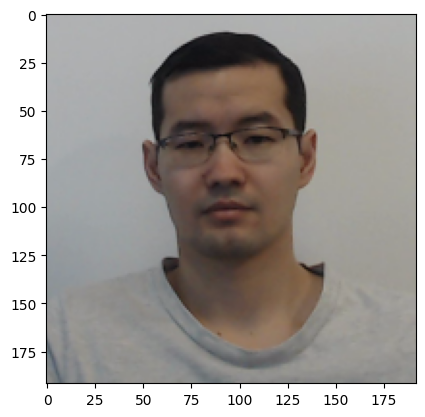

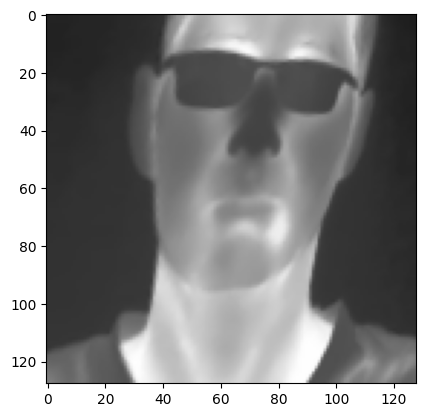

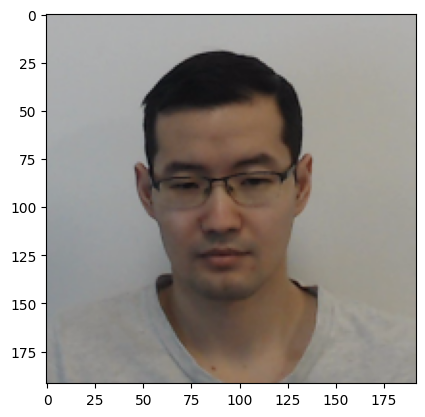

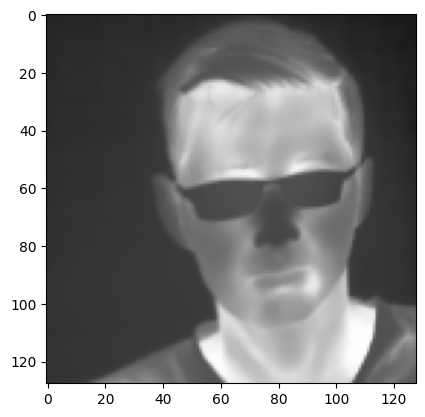

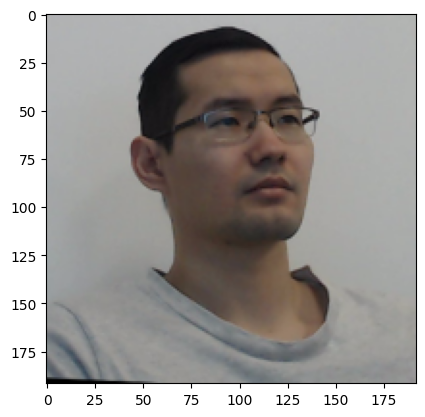

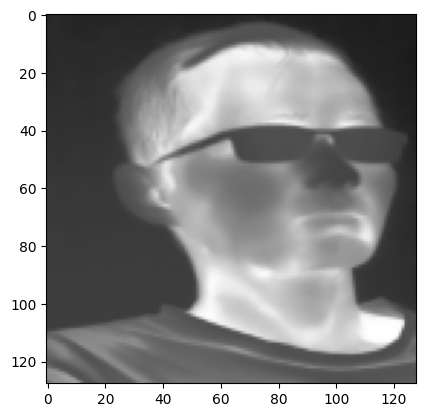

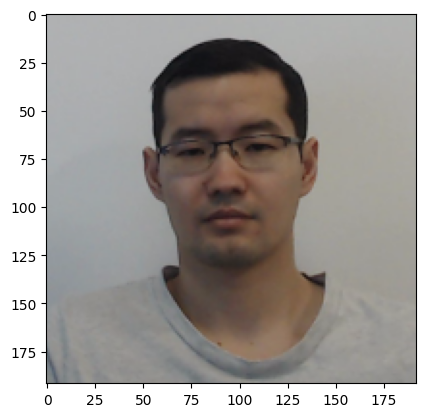

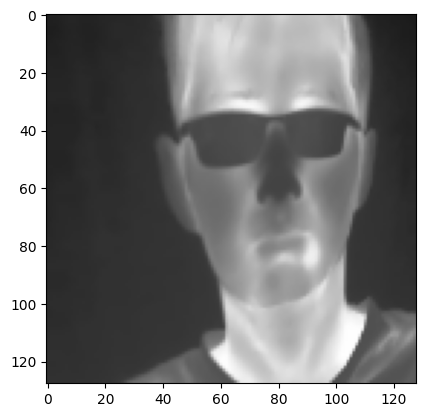

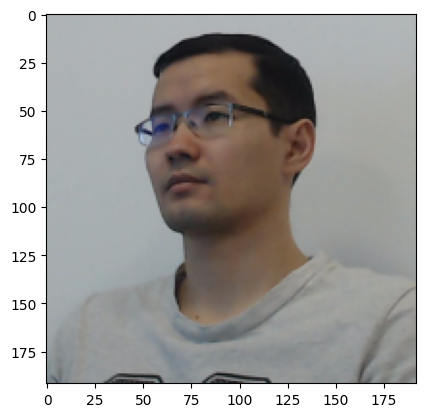

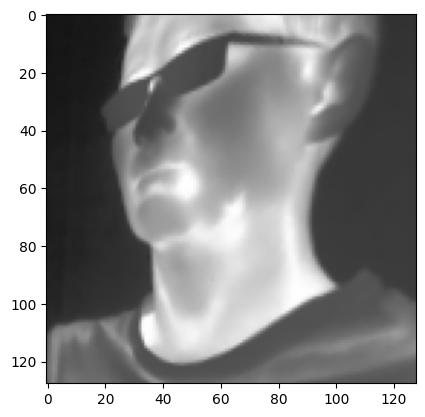

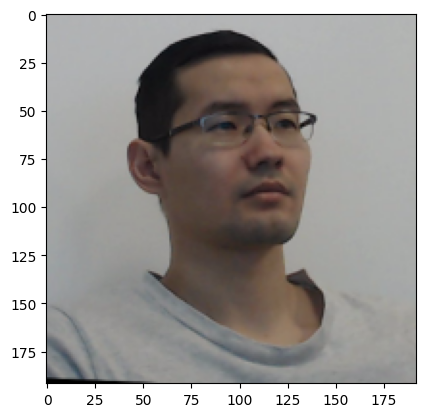

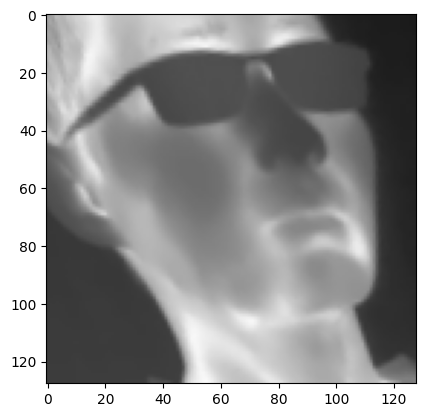

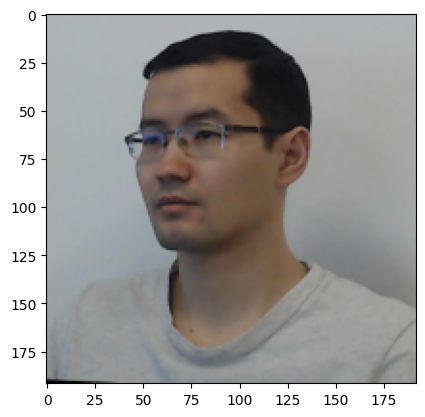

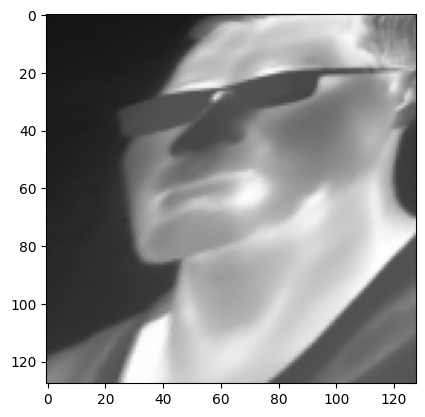

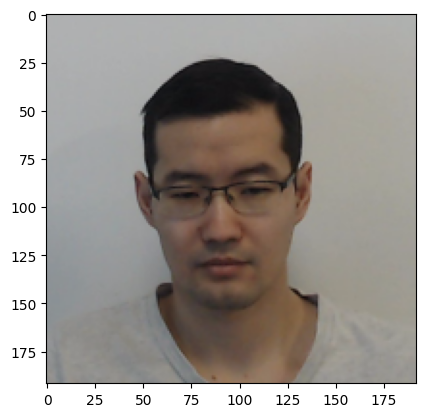

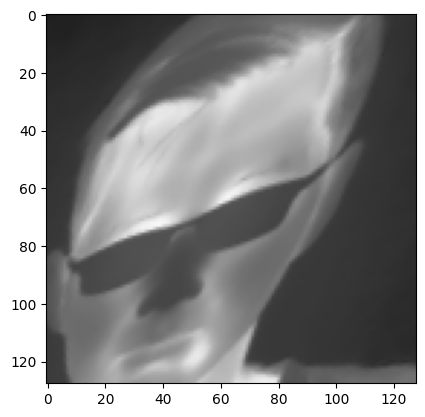

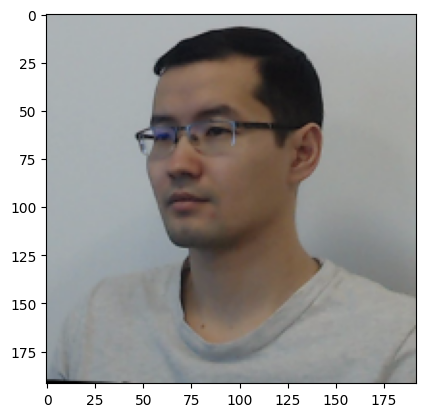

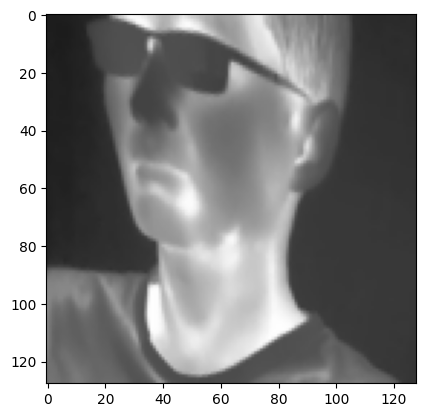

In [22]:
import random
# Review some images
no_imgs = len(os.listdir('./val_rgb_input'))
val_rgb_dir = './val_rgb_input'
val_thr_dir = './val_thr_template'

for _ in range(10):
    rand_idx = random.randint(0, no_imgs)
    rgb = cv2.cvtColor(cv2.imread(os.path.join(val_rgb_dir, os.listdir(val_rgb_dir)[rand_idx])), cv2.COLOR_RGB2BGR)
    plt.imshow(rgb)
    plt.show()
    
    thr = cv2.imread(os.path.join(val_thr_dir, os.listdir(val_thr_dir)[rand_idx]))
    plt.imshow(thr)
    plt.show()